In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime

import pandas as pd
import numpy as np

In [2]:
def article_score_stock_graph(corp1,corp2):
    csv = pd.read_csv('./scoredate/'+corp1+'_scda.csv')           ############ _scda.csv 있는 파일 디렉토리 설정
    csv['score'] = (csv['npos']-csv['nneg'])/csv['nwords']
    stock = data.DataReader([corp2],'yahoo','2019-08-02','2021-08-31')
    stock['earnings rate']=stock['Adj Close'].pct_change()
    
    del csv['Unnamed: 0']
    csv.dropna(axis=0,inplace=True)
    
    csv.index = pd.to_datetime(csv['date'])
    csv = csv.sort_index(ascending=True)
    
    
    fig, ax1 = plt.subplots(figsize=(20,10))
    ax2 = ax1.twinx()

    ax1.set_title(corp1+' article score'+' vs '+corp2+' earnings rate', fontsize=15)
    ax1.set_ylabel(corp1)
    ax2.set_ylabel(corp2)

    ax1.set_xlabel("Date Time")

    ax1.plot(csv['score'],color='blue')
    ax2.plot(stock['earnings rate'],color='red')

    ax1.legend([corp1+' article score'],loc='upper left')
    ax2.legend([corp2+' earnings rate'],loc='upper right')
    plt.show()

Corp1 : 'TESLA', 'Microsoft', 'Amazon', 'Spotify', 'PFIZER', 'AMD', 'Walmart', 'ALTRIA, 'Coca-cola, 'NIKE', 'Facebook' 
Corp2 : 'TSLA'  'MSFT'  'AMZN'  'SPOT'  'PFE'  'AMD'   'WMT'  'MO'  'KO'  'NKE'   'FB'   

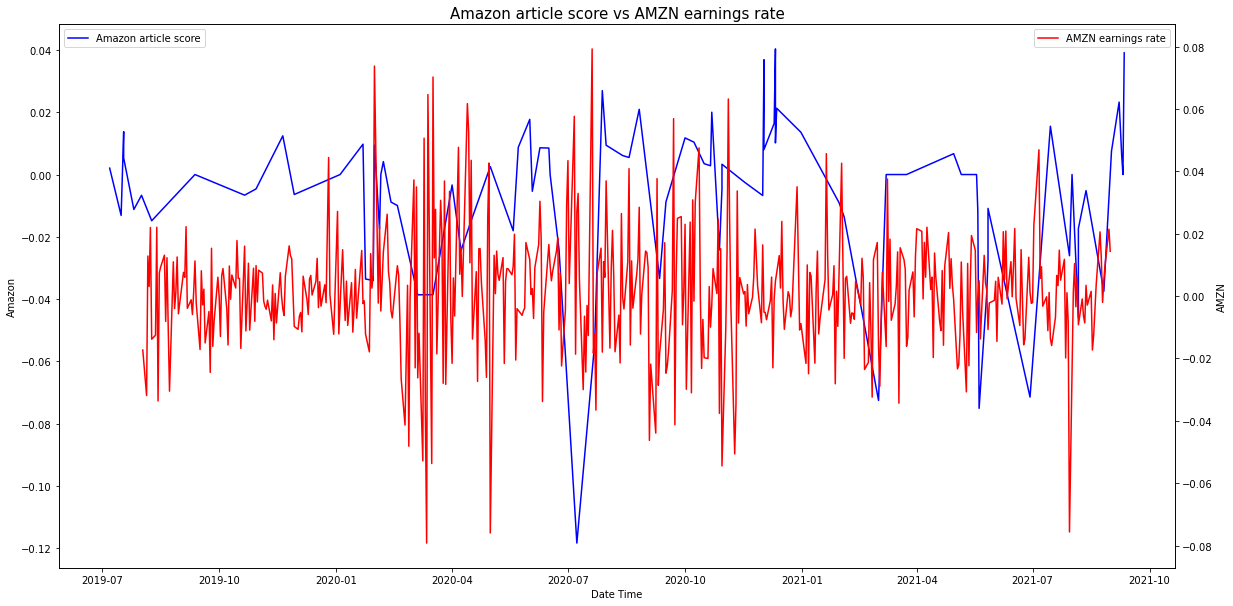

In [3]:
article_score_stock_graph('Amazon','AMZN')